In [224]:
import numpy as np

def normalise_vector(a):
    a_array = np.array(a)
    a_length = np.linalg.norm(a_array)
    a_normalised = a_array/a_length
    return tuple(np.round(a_normalised,2))


In [225]:
def vector_angle(a,b):
    return np.arccos(np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)))
#print(np.rad2deg(vector_angle((1,2,3),(5,7,4))))

In [226]:
import random

def generate_random_3dtuple(n,string,normalise,roomsize):
    coordinates_dict = {}
    for i in range(1, n + 1):
        x = round(random.uniform(0, roomsize),0)  
        y = round(random.uniform(0, roomsize),0)
        z = round(random.uniform(0, roomsize),0)
        if normalise:
            coordinates_dict[string+"_"+f'{i}'] = normalise_vector((x, y, z))
        else:
            coordinates_dict[string+"_"+f'{i}'] = (x, y, z)
    return coordinates_dict
n = 4
roomsize = 10
random_points = generate_random_3dtuple(n,"Mirror",normalise = False,roomsize=10)
random_normals = generate_random_3dtuple(n,"Normal",normalise = True,roomsize=10)
random_points["Mirror_1"] = (10,10,5) #chosen coordinates for Mirror1 for its greatest sight of all other mirrors
random_normals["Normal_1"] = normalise_vector((-1,-1,0))
laser_point = (0,0,5)
laser_normal = normalise_vector((1,1,0))
print(random_points)
print(random_normals)


{'Mirror_1': (10, 10, 5), 'Mirror_2': (7.0, 5.0, 2.0), 'Mirror_3': (4.0, 10.0, 4.0), 'Mirror_4': (4.0, 2.0, 8.0), 'Mirror_5': (8.0, 8.0, 7.0), 'Mirror_6': (4.0, 8.0, 10.0)}
{'Normal_1': (-0.71, -0.71, 0.0), 'Normal_2': (0.45, 0.0, 0.89), 'Normal_3': (0.67, 0.59, 0.45), 'Normal_4': (0.12, 0.81, 0.58), 'Normal_5': (0.99, 0.0, 0.12), 'Normal_6': (0.81, 0.58, 0.12)}


In [227]:
def check_1(m1,m2,n2,limit): #a and b are the mirror coordinates, going a to b. n is the normal vector of mirror b
    vector = np.array(m2)-np.array(m1)
    angle = 180-np.rad2deg(vector_angle(vector,n2))
    #print(vector,angle)
    return angle<limit
#print(check_1((1,2),(-1,-6),(1,2),25))


In [228]:


def check_2(m1, m2, n2, limit,m3):
    m1,m2 = np.array(m1),np.array(m2)
    laser_beam = m1 - m2
    incident_angle = vector_angle(laser_beam, n2)
    # reflective_angle = (2 * limit) - incident_angle
    rotation_axis = np.cross(laser_beam, n2) 
    v1 = normalise_vector(rotation_axis)  
    theta_degrees = np.abs(limit - incident_angle) #not sure if this needs to be positive or negative!!!!!!
    theta_radians = np.deg2rad(theta_degrees)
    
    if np.isclose(theta_radians, 0):
        return n2

    v2 = np.cross(n2, v1)
    cos_theta = np.dot(n2, v1)
    sin_theta = np.linalg.norm(v2)
    
    n2,v1,v2 = np.array(n2),np.array(v1),np.array(v2)

    # Rodrigues' rotation formula
    n2_R = n2 * np.cos(theta_radians) + v2 * np.sin(theta_radians) + v1 * cos_theta * (1 - np.cos(theta_radians)) #n2 to n2_rotated
    n2_R /= np.linalg.norm(n2_R)
    
    return vector_angle(n2_R,m3-m2)<=limit


#print(check_2(np.array([0,0,0]), np.array([1,1,2]), np.array([0.1,0.2,0.3]), 0.02,np.array([0,0,0])))


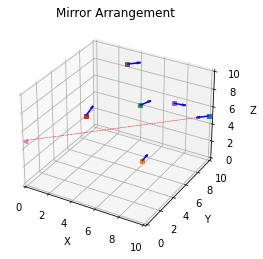

In [229]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#print(random_points)
#print(random_normals)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for (mirror_name,point1),(normal_name,point2) in zip(random_points.items(),random_normals.items()):
        ax.scatter(point1[0],point1[1],point1[2],label=mirror_name,marker=",")
        ax.quiver(point1[0],point1[1],point1[2],point2[0],point2[1],point2[2],label=normal_name,color='blue')

ax.scatter(laser_point[0],laser_point[1],laser_point[2],marker="<")
ax.plot([laser_point[0],random_points["Mirror_1"][0]],
        [laser_point[1],random_points["Mirror_1"][1]],
        [laser_point[2],random_points["Mirror_1"][2]],
        color="r",linewidth=0.5,linestyle="dashed")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0,roomsize)
ax.set_ylim(0,roomsize)
ax.set_zlim(0,roomsize)

ax.set_title('Mirror Arrangement')

#ax.legend()

plt.show()



In [230]:
limit = 25
init = False
check1_pass = []
check2_pass = []
mirror_name,point1=list(random_points.keys()),list(random_points.values())
normal_name,point2=list(random_normals.keys()),list(random_normals.values())

if check_1(laser_point,random_points["Mirror_1"],random_normals["Normal_1"],limit):
        for i in range(len(random_points)):
                for j in range(len(random_points)-1):
                        mn1 = mirror_name[i]
                        mn2 = mirror_name[j+1]
                        check1 = check_1(point1[j],point1[j+1],point2[j+1],limit)
                        if check1==True:
                                check1_pass.append((mn1,mn2))
                        print(f"{mn1} to {mn2} Check 1 Result = {check1}")
                for k in range(len(random_points)-1):
                        ls = mirror_name[i-1]
                        mn1 = mirror_name[i]
                        mn2 = mirror_name[k]
                        if i==0:
                                check2 = check_2(laser_point,point1[i],point2[i],limit,point1[k])
                        else:
                                check2 = check_2(point1[i-1],point1[i],point2[i],limit,point1[k])
                        if check2==True:
                                check2_pass.append((ls,mn1,mn2))
                        print(f"{ls} to {mn1} to {mn2} Check 2 Result = {check2}")
                        
print(check1_pass)
print(check2_pass)


Mirror_1 to Mirror_2 Check 1 Result = False
Mirror_1 to Mirror_3 Check 1 Result = False
Mirror_1 to Mirror_4 Check 1 Result = False
Mirror_1 to Mirror_5 Check 1 Result = False
Mirror_1 to Mirror_6 Check 1 Result = False
Mirror_6 to Mirror_1 to Mirror_1 Check 2 Result = False
Mirror_6 to Mirror_1 to Mirror_2 Check 2 Result = False
Mirror_6 to Mirror_1 to Mirror_3 Check 2 Result = False
Mirror_6 to Mirror_1 to Mirror_4 Check 2 Result = False
Mirror_6 to Mirror_1 to Mirror_5 Check 2 Result = False
Mirror_2 to Mirror_2 Check 1 Result = False
Mirror_2 to Mirror_3 Check 1 Result = False
Mirror_2 to Mirror_4 Check 1 Result = False
Mirror_2 to Mirror_5 Check 1 Result = False
Mirror_2 to Mirror_6 Check 1 Result = False
Mirror_1 to Mirror_2 to Mirror_1 Check 2 Result = True
Mirror_1 to Mirror_2 to Mirror_2 Check 2 Result = False
Mirror_1 to Mirror_2 to Mirror_3 Check 2 Result = True
Mirror_1 to Mirror_2 to Mirror_4 Check 2 Result = True
Mirror_1 to Mirror_2 to Mirror_5 Check 2 Result = True
Mirr

C:\Users\prabr\AppData\Local\Temp\ipykernel_25996\2493716745.py:6: RuntimeWarning: invalid value encountered in divide
  a_normalised = a_array/a_length
C:\Users\prabr\AppData\Local\Temp\ipykernel_25996\659231688.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return np.arccos(np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)))


In [231]:

for i in range(len(check2_pass)):
    if len(set(check2_pass[i]))<len(check2_pass[i]):
        check2_pass[i]=[]
        
check2_pass = [item for item in check2_pass if item]

print("Paths that passed = ",check2_pass)

paths = []

for i in range(len(check2_pass)):
    for j in range(len(check2_pass)):
        if check2_pass[i][0]==check2_pass[j][-1]:
            left = np.delete(check2_pass[j],-1)
            right = np.delete(check2_pass[i],0)
            paths.append(np.concatenate((left,right)))
            #print(check2_pass[i],check2_pass[j])
            #print((np.delete(check2_pass[i],0)))
            #print((np.delete(check2_pass[j],-1)))
            #print(np.concatenate((left,right)))
        elif check2_pass[i][-1]==check2_pass[j][0]:
            right = np.delete(check2_pass[j],0)
            left = np.delete(check2_pass[i],-1)
            paths.append(np.concatenate((left,right)))

#print(np.unique(paths,axis=0))
paths = list(np.unique(paths,axis=0))
print("Paths concenated together = ",paths)

print(len(set(paths[0])))
for i in range(len(paths)):
    #print(paths.astype(set))
    if len(set(paths[i]))<3: #Set to 3 because loops can be made with a minimum of 3 connections
        paths[i]=[]
    
paths = [arr for arr in paths if len(arr) > 0]


#print("Real paths = ",paths)
print(paths)


Paths that passed =  [('Mirror_1', 'Mirror_2', 'Mirror_3'), ('Mirror_1', 'Mirror_2', 'Mirror_4'), ('Mirror_1', 'Mirror_2', 'Mirror_5'), ('Mirror_2', 'Mirror_3', 'Mirror_1'), ('Mirror_2', 'Mirror_3', 'Mirror_4'), ('Mirror_2', 'Mirror_3', 'Mirror_5'), ('Mirror_3', 'Mirror_4', 'Mirror_1'), ('Mirror_3', 'Mirror_4', 'Mirror_2'), ('Mirror_3', 'Mirror_4', 'Mirror_5'), ('Mirror_4', 'Mirror_5', 'Mirror_1'), ('Mirror_4', 'Mirror_5', 'Mirror_2'), ('Mirror_4', 'Mirror_5', 'Mirror_3'), ('Mirror_5', 'Mirror_6', 'Mirror_1'), ('Mirror_5', 'Mirror_6', 'Mirror_2'), ('Mirror_5', 'Mirror_6', 'Mirror_3'), ('Mirror_5', 'Mirror_6', 'Mirror_4')]
Paths concenated together =  [array(['Mirror_1', 'Mirror_2', 'Mirror_4', 'Mirror_1'], dtype='<U8'), array(['Mirror_1', 'Mirror_2', 'Mirror_4', 'Mirror_2'], dtype='<U8'), array(['Mirror_1', 'Mirror_2', 'Mirror_4', 'Mirror_5'], dtype='<U8'), array(['Mirror_1', 'Mirror_2', 'Mirror_5', 'Mirror_1'], dtype='<U8'), array(['Mirror_1', 'Mirror_2', 'Mirror_5', 'Mirror_2'], dtyp

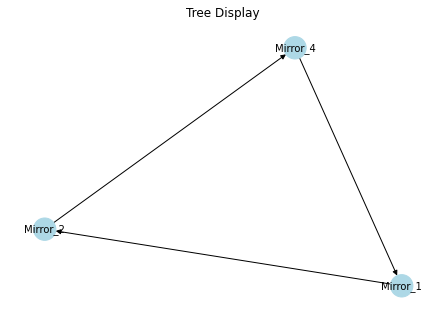

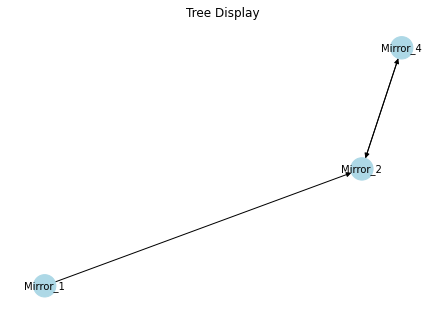

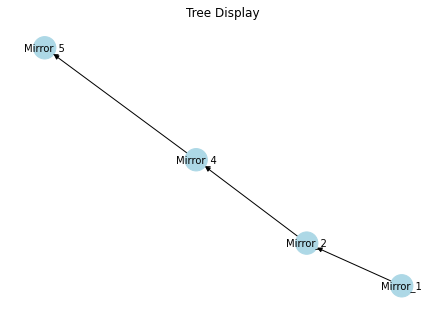

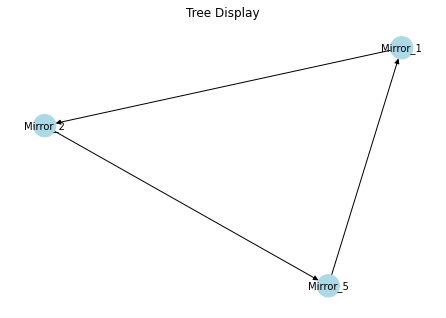

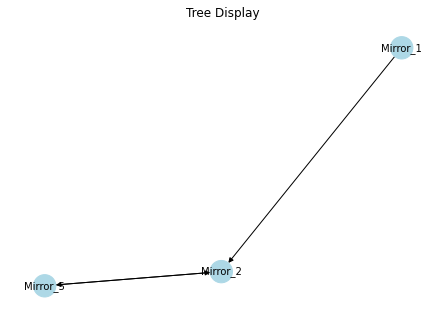

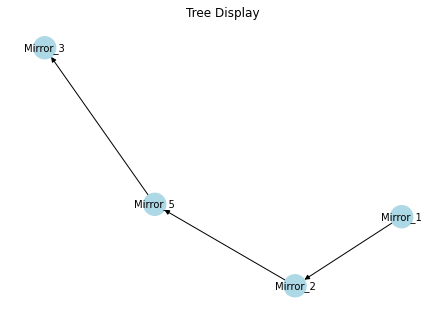

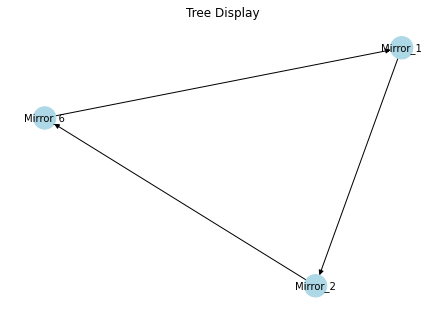

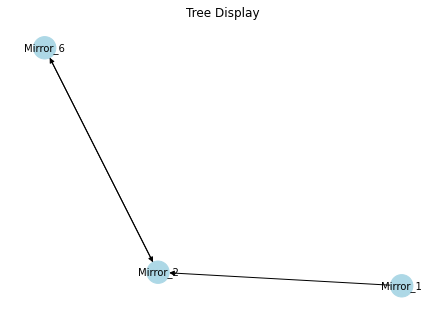

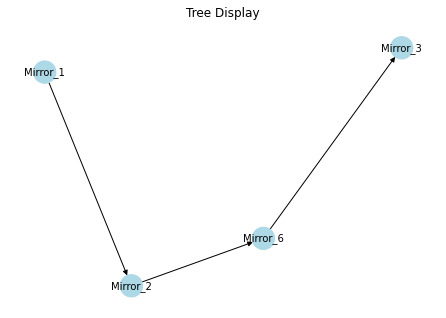

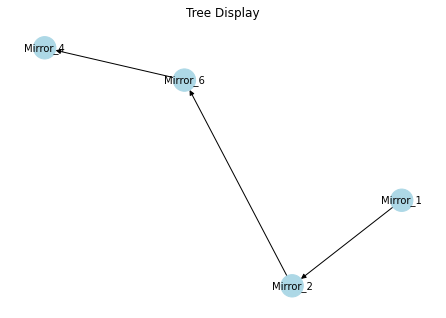

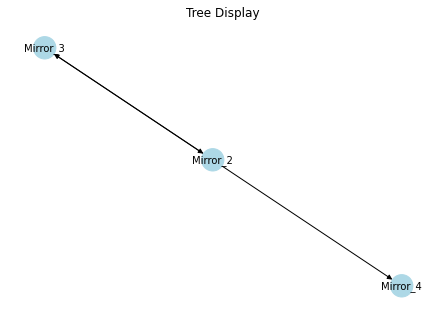

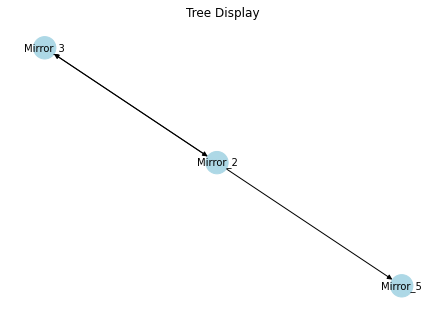

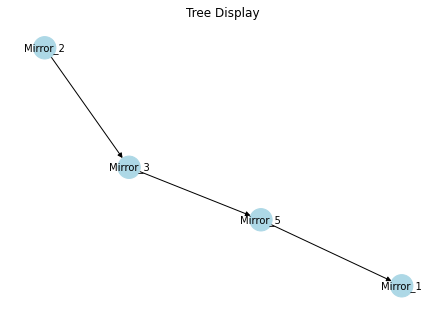

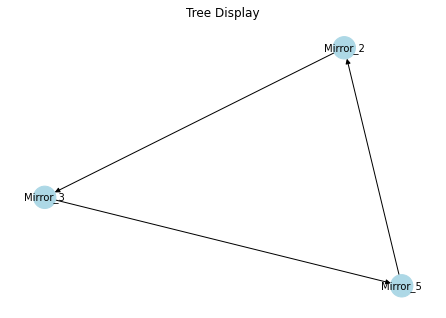

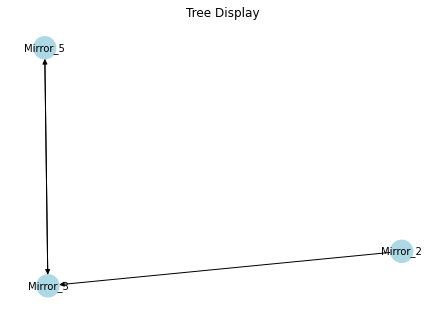

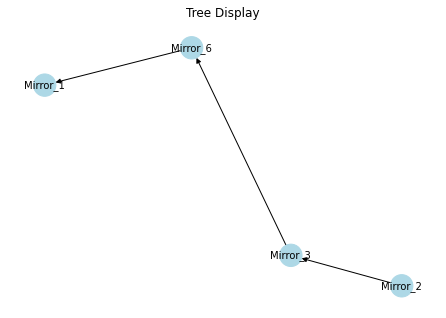

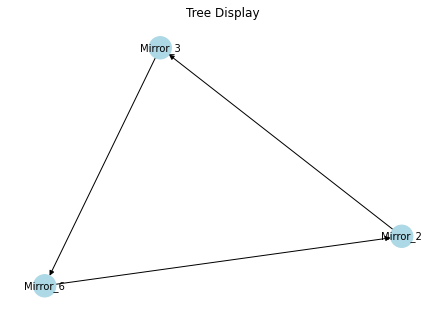

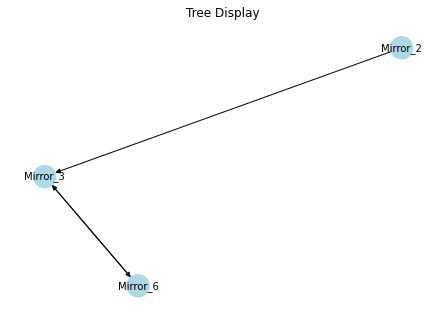

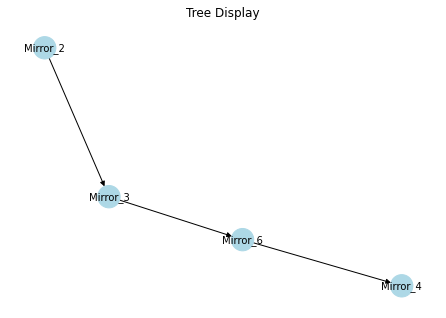

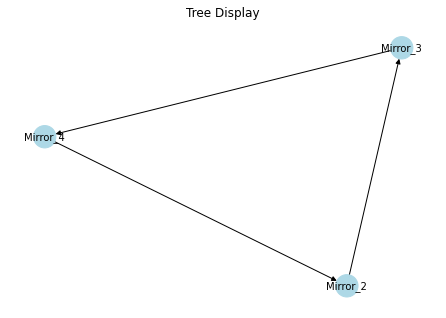

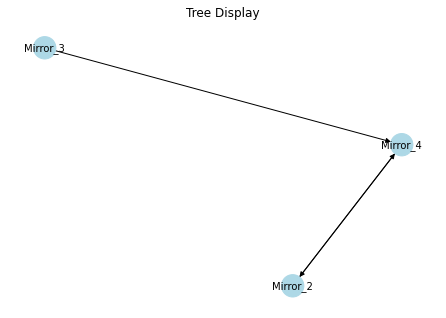

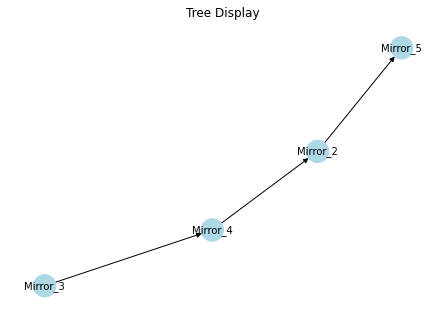

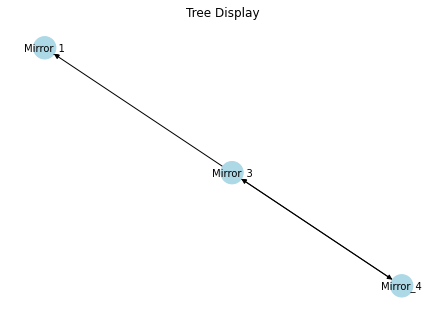

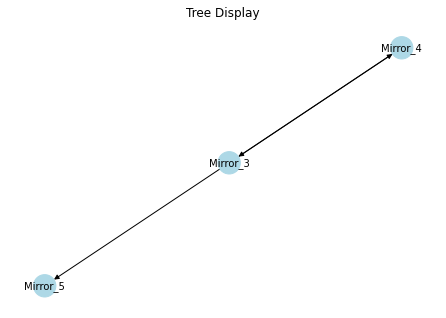

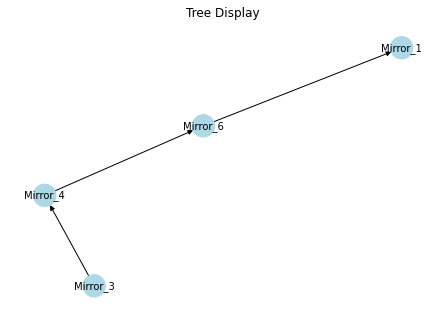

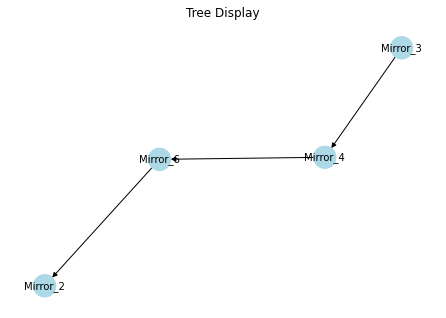

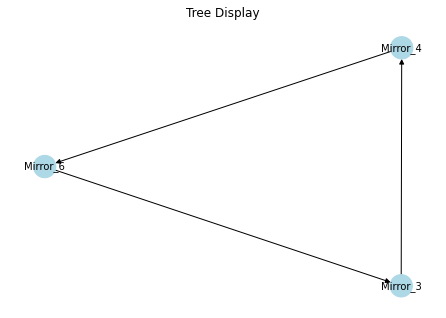

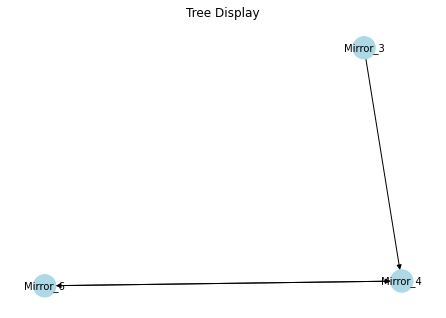

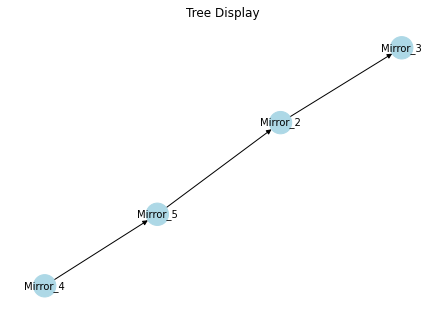

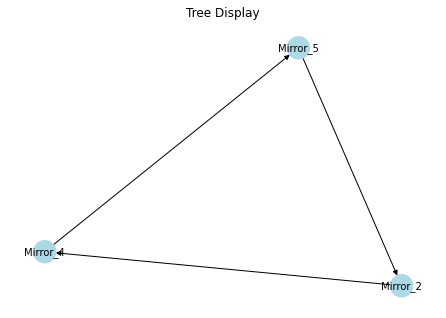

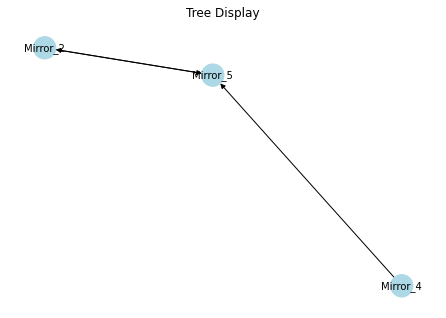

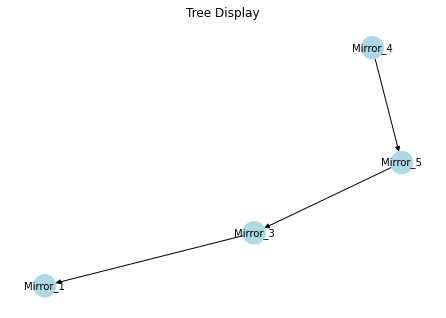

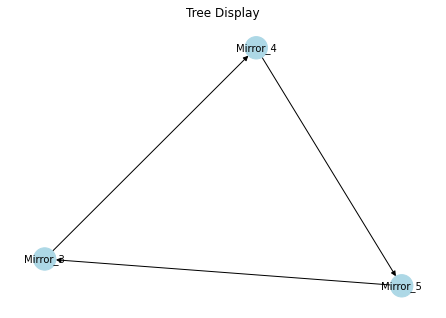

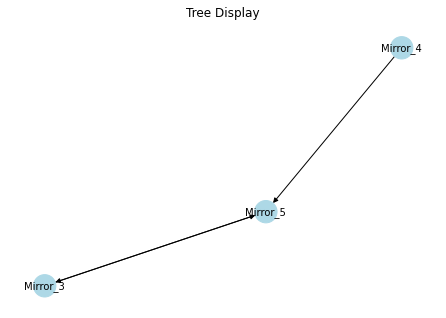

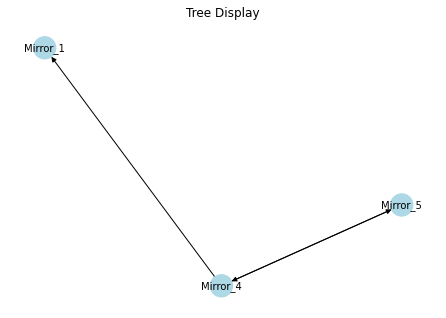

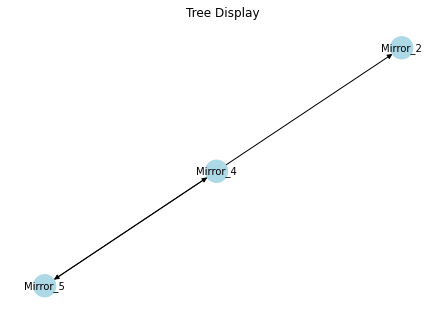

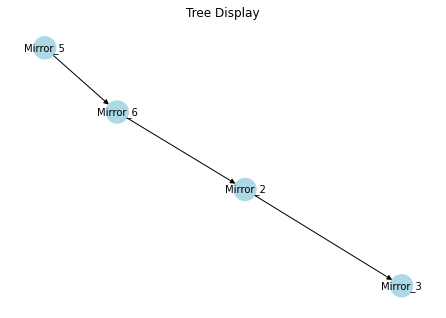

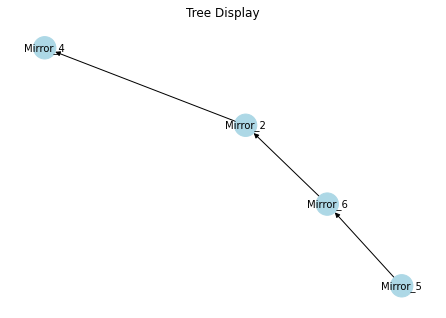

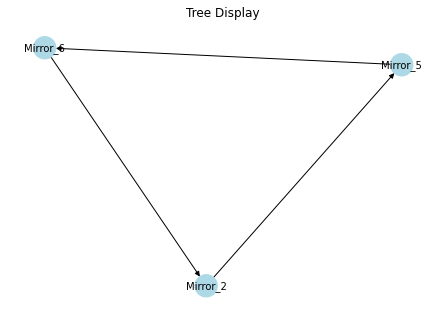

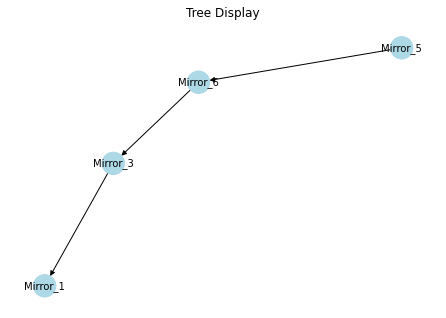

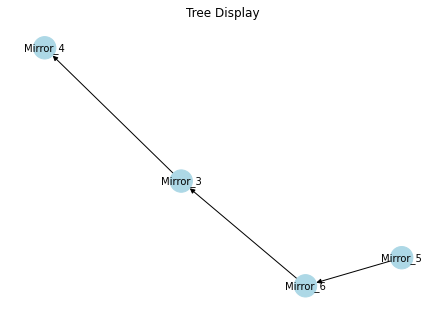

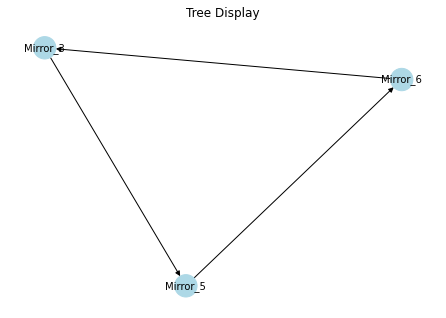

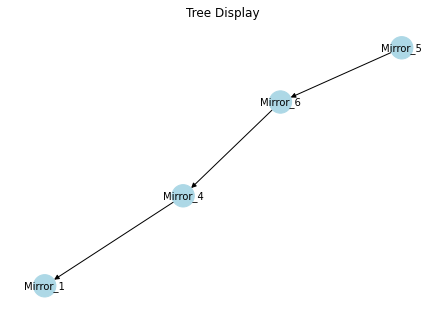

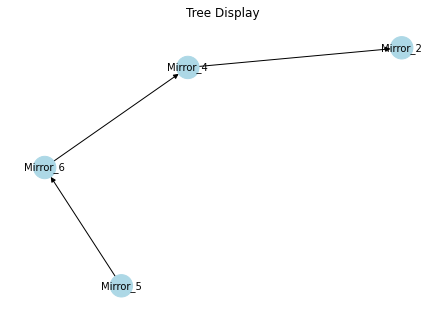

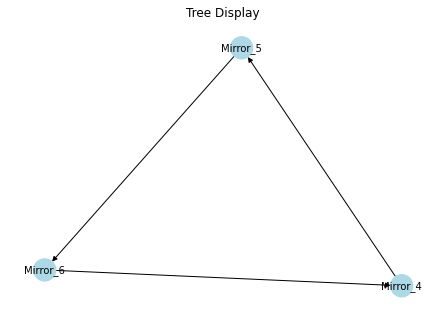

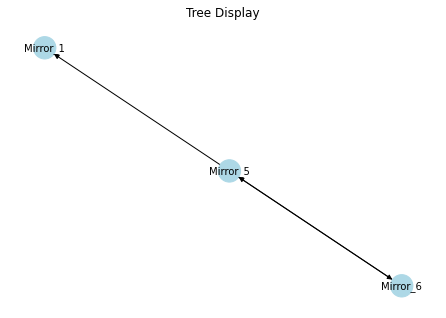

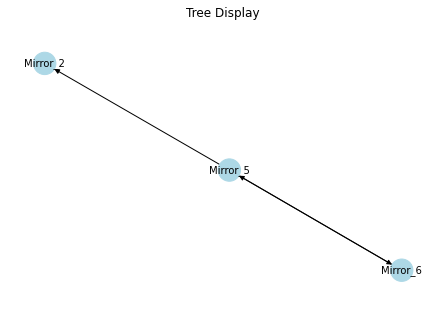

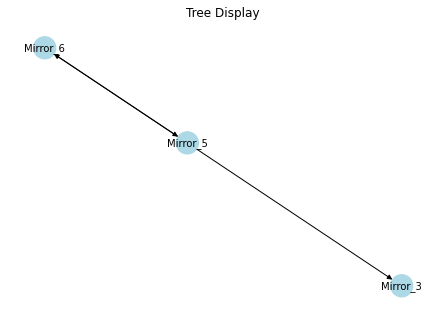

In [232]:
import networkx as nx
import matplotlib.pyplot as plt

def display_tree(data):
    # Create an empty directed graph
    G = nx.DiGraph()

    # Add nodes and edges to the graph
    for arr in data:
        for i in range(len(arr) - 1):
            source = arr[i]
            target = arr[i + 1]
            G.add_edge(source, target)

    # Create a layout for the graph (you can choose a different layout if needed)
    pos = nx.spring_layout(G)

    # Draw the graph
    labels = {node: node for node in G.nodes()}
    node_colors = ['lightblue' for _ in G.nodes()]

    nx.draw(G, pos, labels=labels, node_color=node_colors, with_labels=True, node_size=500, font_size=10)

    # Show the plot
    plt.title("Tree Display")
    plt.show()

for i in range(len(paths)):
    display_tree([paths[i]])
